In [1]:
import pandas as pd 
from datetime import datetime

data = pd.read_excel('./2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx')

data.head()

,NS Shop+ 2019.01.01~12.31,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000


In [2]:
## 1번째 행을 컬럼으로 설정
data = data.rename(columns=data.iloc[0])
data = data.drop(data.index[0])  ## 컬럼으로 설정한 행 제거

data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000


In [3]:
## 컬럼별 결측치 확인
data.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액       2930
dtype: int64

In [4]:
data = data.dropna(subset=['취급액'])  ## 취급액 결측치 행 제거 
data = data.fillna(method='ffill')  ## 노출시간 결측치 앞의 값으로 채우기 (null값 앞의 방송시간과 동일하므로)
data.tail()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
38300,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000
38301,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000
38302,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000
38303,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000
38304,2020-01-01 00:00:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,46608000


In [5]:
## 결측치 제거 확인
data.isnull().sum()

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
취급액      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 1 to 38304
Data columns (total 8 columns):
방송일시     35379 non-null datetime64[ns]
노출(분)    35379 non-null float64
마더코드     35379 non-null int64
상품코드     35379 non-null int64
상품명      35379 non-null object
상품군      35379 non-null object
판매단가     35379 non-null int64
취급액      35379 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.4+ MB


In [7]:
from datetime import datetime

data['요일'] = data['방송일시'].dt.weekday
data = data.astype({'방송일시': 'str'})
data = data.replace('-','',regex=True)
data['방송날짜'] = data.방송일시.str.split(' ').str[0]
data['방송시간'] = data.방송일시.str.split(' ').str[1]
del data['방송일시']

new_columns = ['방송날짜',  '방송시간', '요일', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가','취급액']
data = data[ new_columns ]

data.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,20190101,06:00:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,20190101,06:00:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,20190101,06:20:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,20190101,06:20:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,20190101,06:40:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000


In [8]:
# 판매량 컬럼 만들기
def sales_value (data):    
    data['판매량'] = data['취급액'] / data['판매단가'] 
    return data

data = sales_value(data)
data = data.astype({'판매량': 'int'})
data.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
1,20190101,06:00:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52
2,20190101,06:00:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109
3,20190101,06:20:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81
4,20190101,06:20:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174
5,20190101,06:40:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167


In [9]:
data.to_excel('./실적 전처리.xlsx', index = False)

In [10]:
yearmonth_list = []

for date in data['방송날짜']:
    yearmonth = str(date)[:6]# 왼쪽부터 6자리 문자 선택
    yearmonth_list.append(yearmonth)

# 연월/ 월일 컬럼 추가하기
data['연월'] = yearmonth_list

data.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,연월
1,20190101,06:00:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52,201901
2,20190101,06:00:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109,201901
3,20190101,06:20:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81,201901
4,20190101,06:20:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174,201901
5,20190101,06:40:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167,201901


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
from matplotlib import font_manager, rc

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

In [12]:
## 월별 취급액 순위
data_month = pd.pivot_table(data, index = ['연월'], values = ['취급액'], aggfunc='sum')
data_month.drop(data_month.tail(1).index,inplace=True)  ## 1월 1일 00시 데이터밖에 없는 20년도 데이터 삭제

data_month_S = data_month.sort_values(by = '취급액', ascending= False)
data_month_S.head(10)

,취급액
연월,
201912,79917182000
201911,73935391000
201907,69015098000
201908,69011952000
201905,68900078000
201910,68843479000
201901,68705807000
201909,67469108000
201906,66337499000


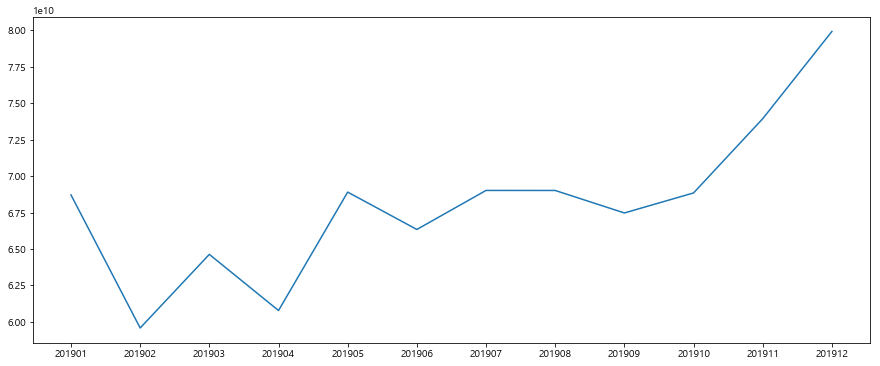

In [13]:
## 월별 취급액 시계열 그래프
plt.figure(figsize=(15, 6))
plt.plot(data_month)

In [14]:
## 월별 상품군 취급액 순위
data_month_P = pd.pivot_table(data, index = ['연월','상품군'], values = ['취급액','판매량'], aggfunc='sum')
data_month_P.drop(data_month_P.tail(1).index,inplace=True)  ## 1월 1일 00시 데이터밖에 없는 20년도 데이터 삭제
data_month_P = data_month_P.reset_index(1)  # 인덱스 '연월'로 재설정
data_month_PS = data_month_P.sort_values(by = '취급액', ascending= False)

data_month_PS.head(10)

,상품군,취급액,판매량
연월,,,
201908,농수축,20985382000,485026
201901,농수축,20536278000,429772
201909,농수축,18731702000,434000
201910,농수축,15927880000,373026
201912,농수축,14951289000,363215
201911,농수축,14877379000,348376
201907,농수축,14422835000,317112
201906,속옷,13872099000,160931
201901,주방,12613763000,116103


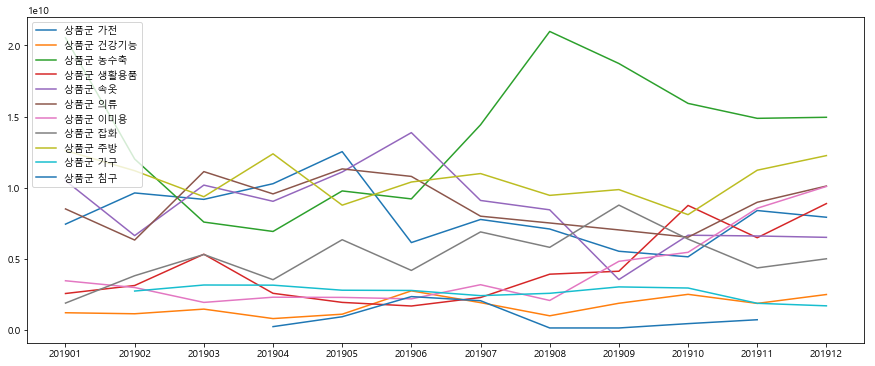

In [15]:
## 월별 상품군 매출 추이 시계열 그래프 (trend, seasonality 확인)
plt.figure(figsize=(15, 6))
for i in data_month_P.상품군.unique()[:11]:
    plt.plot(data_month_P[data_month_P.상품군 ==i ].index, data_month_P[data_month_P.상품군 ==i ].취급액, label='상품군 {}'.format(i))

    plt.legend()

In [16]:
# 상품별 취급액 상위 5개 
data_P = data.pivot_table(index = ['상품코드','상품군','상품명'], values = ['취급액','판매량'], aggfunc='sum')
data_P = data_P.sort_values(by = '취급액', ascending = False)

data_P.head()

,,,취급액,판매량
상품코드,상품군,상품명,,
200864,농수축,안동간고등어 20팩,14391949000,465598
200014,농수축,AAB의 소곱창전골 800g x 8팩,11923972000,213181
200868,주방,한일 대용량 스텐 분쇄믹서기,11607152000,105565
201479,농수축,국내산 손질갑오징어 8팩,9417609000,188653
200236,주방,에코라믹 통주물 스톤 냄비세트,8327167000,136632


In [17]:
# 상품별 판매량 상위5 
data_S = data.pivot_table(index = ['상품코드','상품군','상품명'], values = ['취급액','판매량'], aggfunc='sum')
data_S = data_S.sort_values(by = '판매량', ascending = False)

data_S.head()

,,,취급액,판매량
상품코드,상품군,상품명,,
200864,농수축,안동간고등어 20팩,14391949000,465598
200014,농수축,AAB의 소곱창전골 800g x 8팩,11923972000,213181
201479,농수축,국내산 손질갑오징어 8팩,9417609000,188653
200197,이미용,비버리힐스폴로클럽 남성기초세트(2018FW골드),6239718000,156705
200199,이미용,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),5946118000,149351


In [18]:
# 상품별 취급액 하위5
data_P.tail()

,,,취급액,판매량
상품코드,상품군,상품명,,
202006,건강기능,"여자를 위한 빨강 팥물, 레드빈 티톡 50포",1419000,32
200203,가구,유캐슬 마리노 5단 서랍장,863000,2
200558,가전,일시불 LG전자 휴대용 퓨리케어 미니 공청기,830000,2
200206,가구,유캐슬 마리노 협탁,659000,2
202352,생활용품,도루코 페이스5 면도날 4개입,363000,28


In [19]:
# 상품별 판매량 하위5
data_S.tail()

,,,취급액,판매량
상품코드,상품군,상품명,,
200109,잡화,프라다 테스토 호보백,2866000,2
200558,가전,일시불 LG전자 휴대용 퓨리케어 미니 공청기,830000,2
202335,잡화,[루이띠에]18k 샤인클로버 주얼리 세트,13340000,2
202331,잡화,[루이띠에]18k 샤인클로버 귀걸이,1461000,1
202332,잡화,[루이띠에]18k 샤인클로버 목걸이,2189000,1


In [20]:
# 상품군별 판매실적 순위
data_C = data.pivot_table(index = '상품군', values = ['취급액','판매량'], aggfunc='sum')
data_CS = data_C.sort_values(by = '취급액', ascending = False)
# 단위 : 만
data_CS = data_CS / 10000
data_CS

,취급액,판매량
상품군,,
농수축,16594224.1,377.4042
주방,12686073.1,124.9716
의류,10580314.7,166.5124
속옷,10219648.2,142.3098
가전,9706092.1,9.7626
잡화,6228567.9,92.3424
생활용품,5164198.7,50.0092
이미용,4932261.9,104.5575
가구,2913114.1,4.4246


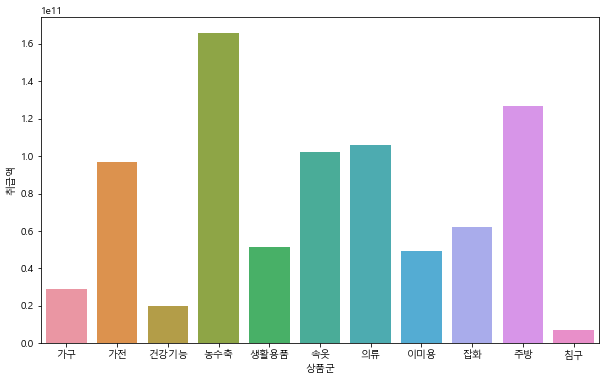

In [21]:
# ## 상품군 총 판매실적 비율
data_C = data_C.reset_index()  #'상품군' 인덱스 -> 컬럼

plt.figure(figsize=(10, 6))
sns.barplot(data_C['상품군'], data_C['취급액'])

In [22]:
# 요일별 판매실적 순위
data_week = data.pivot_table(index = '요일', values = ['취급액','판매량'], aggfunc='sum')
data_week = data_week.sort_values(by = '취급액', ascending= False)
# 단위 : 만
data_week = data_week / 10000
# data_week = data_week.reset_index()
data_week

,취급액,판매량
요일,,
6,13476984.0,172.5316
5,12488422.0,169.0613
1,11374137.0,161.1369
2,11324394.0,153.9598
3,11173735.1,156.2328
0,11057158.0,154.7896
4,10839183.5,144.2517


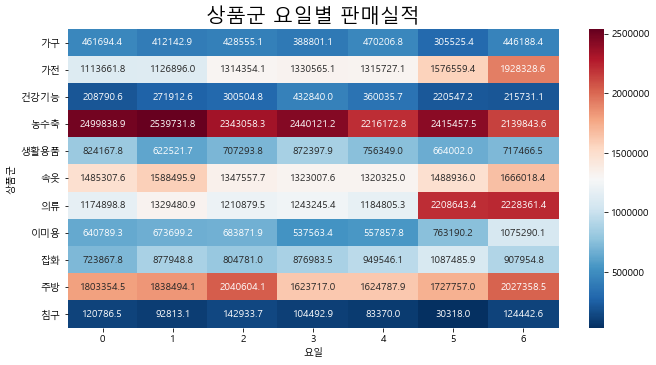

In [25]:
# 상품군 요일별 판매실적
data_CW = data.pivot_table(index = '상품군', columns = '요일', values = '취급액', aggfunc='sum')

# 단위 : 억
data_CW = data_CW / 10000

# 상품군 요일별 판매실적 히트맵
fig, ax = plt.subplots( figsize=(len(data_CW),len(data_CW)/2) )   # 그래프 사이즈 지정
plt.title("상품군 요일별 판매실적", fontsize = 20) # for title
sns.heatmap(data_CW, cmap = "RdBu_r", 
           annot = True, fmt = '.1f')

In [26]:
## 시간대별 판매실적 Top 10
data_time = data.pivot_table(index = '방송시간', values = ['취급액','판매량'], aggfunc='sum')
data_time = data_time.sort_values(by = '취급액', ascending= False)
data_time.head(10)

,취급액,판매량
방송시간,,
21:40:00,28579664000,126344
22:40:00,24644004000,115537
20:40:00,20857761000,190230
17:40:00,20157566000,394672
16:40:00,19766078000,399114
21:20:00,18440760000,95035
15:40:00,17867171000,272096
10:40:00,17637749000,250067
19:40:00,17308466000,214310


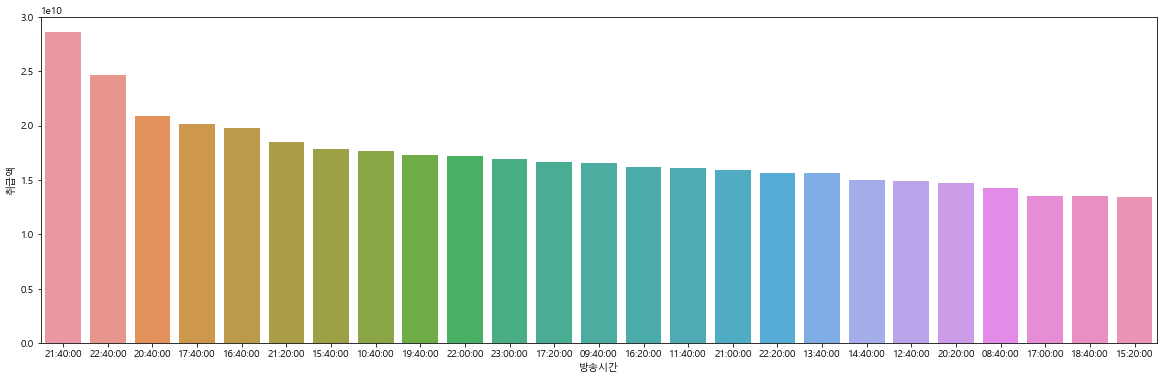

In [27]:
## 시간대별 판매실적 Top 25 그래프
data_time = data_time.reset_index()
data_time = data_time.head(25)

plt.figure(figsize=(20, 6))
sns.barplot(data_time['방송시간'],data_time['취급액'])